In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Raw/Final.csv')

In [3]:
df =pd.read_csv('Raw/Final.csv')
df.drop(columns=['Name', 'SpokenLanguages', 'Location'], inplace=True) # drop non-numeric column
df.Origin = df.Origin.map({'Bangkok': 0,'Phuket': 1,'Koh Samui': 2,'Ko Pha-ngan': 3,'Ko Phi Phi': 4})


In [4]:
#df
#What is left for machine learning

# kNN

In [5]:
# features split
X = df.drop(columns=["Sparkling clean"])
y = df["Sparkling clean"]

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [7]:
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])

Training data size: 3879
Testing data size: 970


In [8]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier with your scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions using the trained classifier and scaled test data
y_pred = knn.predict(X_test_scaled)

C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
# score
accuracy_score(y_test, y_pred)

0.8752577319587629

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

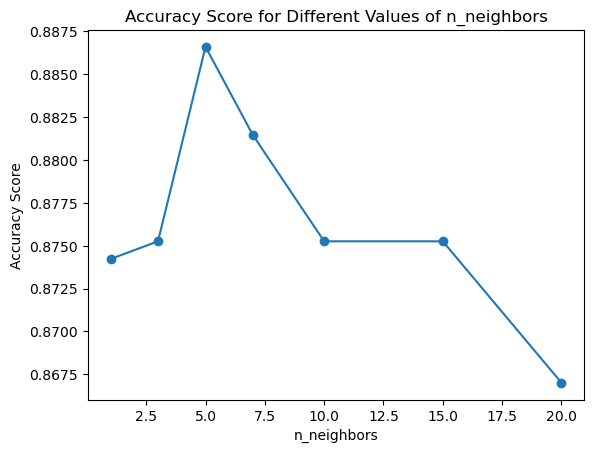

In [12]:

# Define different values of n_neighbors to try
n_neighbors_values = [1, 3, 5, 7, 10, 15, 20]

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Create and train the classifier with the scaled training data
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions using the trained classifier and scaled test data
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracy score and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of n_neighbors')
plt.show()

# LogisticRegression

In [13]:
# features split
X = df.drop(columns=["Sparkling clean"])
y = df["Sparkling clean"]

In [14]:
#X.columns


In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [16]:
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])

Training data size: 3879
Testing data size: 970


In [17]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# train & predict
model = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)# prdict->0/1   the model return  number between 0-1 

In [19]:
# score
accuracy_score(y_test, y_pred)


0.954639175257732

In [20]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

Confusion Matrix:
[[678  26]
 [ 18 248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       704
           1       0.91      0.93      0.92       266

    accuracy                           0.95       970
   macro avg       0.94      0.95      0.94       970
weighted avg       0.96      0.95      0.95       970



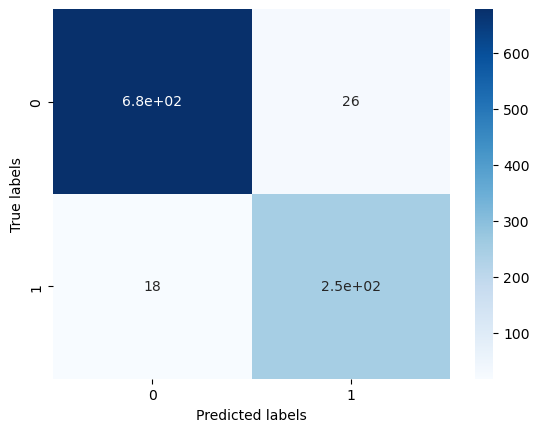

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Classification report
report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# LInearRegression

In [22]:
# features split
X = df[['Real Guest Cleanlines Score', 'Real Guest Facilities Score', 'Real Guest Location Score',
       'Real Guest Service Score', 'Real Guest Value for money Score', 'Price', 'Reviews', 'Booked today', 'Stars',
       'Free WiFi In All Rooms', 'Coffee',"ExcellentView", 'Free WiFi In All Rooms',"Origin","DailyHousekeeping"]]
y = df.Score

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)



In [24]:
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])

Training data size: 3879
Testing data size: 970


In [25]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# train & predict
model = LinearRegression().fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [27]:
# score
r2_score(y_test, y_pred)

0.813293440441015

In [28]:
weights = model.coef_
column_names = X.columns

# Print the column names and their weights in an organized way
print("Column Name\tWeight")
print("-----------------------")
[print(f"{name}\t\t{weight}") for name, weight in zip(column_names, weights)]

Column Name	Weight
-----------------------
Real Guest Cleanlines Score		0.25633281057395835
Real Guest Facilities Score		0.2320988361232763
Real Guest Location Score		0.10650356912995794
Real Guest Service Score		0.151662055579113
Real Guest Value for money Score		0.15162605992319975
Price		0.0238696363383467
Reviews		0.008695514793900851
Booked today		-0.011572553411897186
Stars		-0.012535492160413596
Free WiFi In All Rooms		0.002372616434964013
Coffee		0.00681917983190852
ExcellentView		-0.012212244157181827
Free WiFi In All Rooms		0.0023726164349640094
Origin		0.01182740568188798
DailyHousekeeping		-0.025196750200013933


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

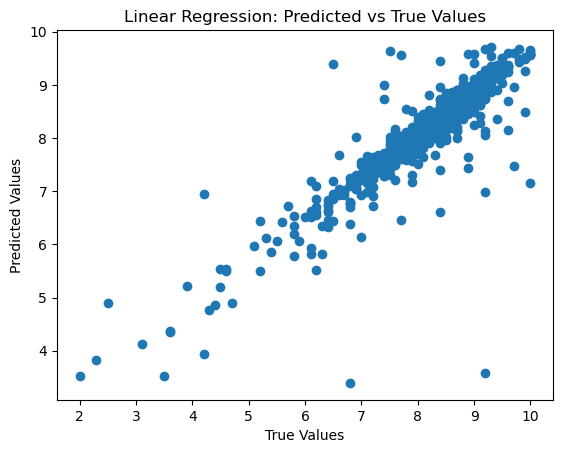

In [29]:
# Scatter plot of predicted vs true values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs True Values")
plt.show()

# Draft

In [30]:
#model.predict([[8,3,0,5,5,10,9,10,5,5,5,8]])

In [31]:
prediction=model.predict([[8,3,3,5,5,10,9,10,5,5,5,7,6,4,7]])

In [32]:
print(prediction)

[12.7025519]
